<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://github.com/dd-consulting">
         <img src="../reference/GZ_logo.png" width="60" align="right">
    </a>
    <h1>
        One-Stop Analytics: Hypothesis Test
    </h1>
</div>


# Case Study of Autism Spectrum Disorder (ASD) with R

---

![](../reference/CDC_ASD/CDC_ASD_01.jpg)

![](../reference/CDC_ASD/CDC_ASD_02.png)


## <span style="color:blue">[ United States ]</span> 

## Centers for Disease Control and Prevention (CDC) - Autism Spectrum Disorder (ASD)

Autism spectrum disorder (ASD) is a developmental disability that can cause significant social, communication and behavioral challenges. CDC is committed to continuing to provide essential data on ASD, search for factors that put children at risk for ASD and possible causes, and develop resources that help identify children with ASD as early as possible.

https://www.cdc.gov/ncbddd/autism/data/index.html


## <span style="color:blue">[ Singapore ]</span> 

## TODAY Online - More preschoolers diagnosed with developmental issues

Doctors cited better awareness among parents and preschool teachers, leading to early referrals for diagnosis.

https://www.todayonline.com/singapore/more-preschoolers-diagnosed-developmental-issues

![](../reference/SG_ASD/SG_ASD_01.png)



![](../reference/SG_ASD/SG_ASD_04.png) 

https://www.pathlight.org.sg/

<div class="alert alert-block alert-info" style="margin-top: 20px">
</div>

# Workshop Objective: 

## Use R to analyze Autism Spectrum Disorder (ASD) data from CDC USA. 

https://www.cdc.gov/ncbddd/autism/data/index.html

* ## Hypothesis Test - Data

* ## Hypothesis Test - Mean - Z Test & t.test() 

* ## Hypothesis Test - Proportion - prop.test()

* ## Hypothesis Test - Case Study: Understanding the newborn gender differences in Singapore

* ## Workshop Submission

* ## Appendices


<div class="alert alert-block alert-info" style="margin-top: 20px">
</div>

## <span style="color:blue">Hypothesis Test</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Hypothesis Test - Data
    </h3>
</div>


**Obtain current R <span style="color:blue">working directory</span>**

In [1]:
getwd()

[1] "/media/sf_vm_shared_folder/git/DDC-ASD/model_R"

**Set new R working directory**

In [2]:
# setwd("/media/sf_vm_shared_folder/git/DDC/DDC-ASD/model_R")
# setwd('~/Desktop/admin-desktop/vm_shared_folder/git/DDC-ASD/model_R')
getwd()

[1] "/media/sf_vm_shared_folder/git/DDC-ASD/model_R"

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [3]:
# Read back in above saved file:
ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
# Convert Year_Factor to ordered.factor
ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) 
ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, 
                                    levels=c("Low", "High"))
ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, 
                                    levels=c("Low", "Medium", "High", "Very High"))


In [4]:
# library(repr)
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Hypothesis Test - Mean - Z Test & t.test()
    </h3>
</div>


### <span style="color:blue">Is there a (statistically significant) of average ASD Prevelances between East states and West states?</span>

**Two sample mean test (t test):**

**Prepare samples**

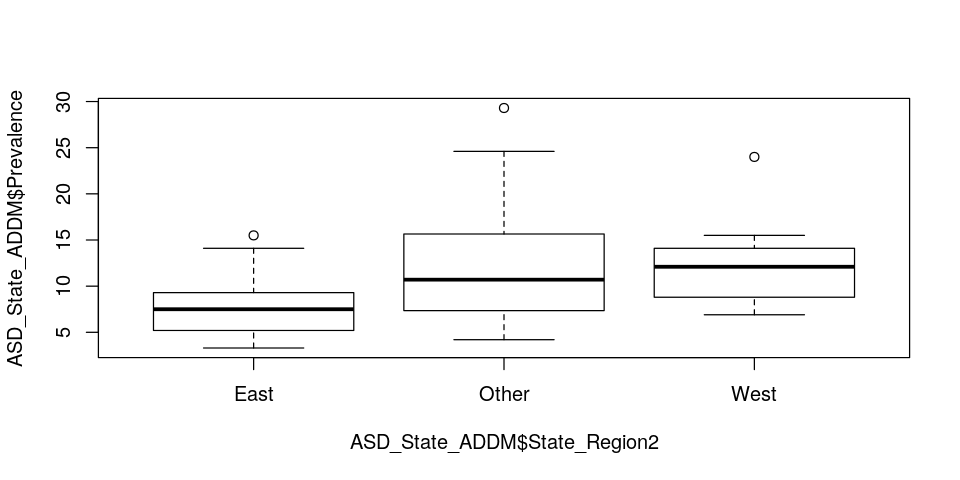

In [5]:

# Filter and create dataframe of different data sources, for easy data access
ASD_State_ADDM <- subset(ASD_State, Source == 'addm')

# Aggregate all US. States into three regions: East, West, Other.
ASD_State_ADDM$State_Region2 <- "Other"
ASD_State_ADDM$State_Region2[ASD_State_ADDM$State_Region %in% 
                             c("D3 East North Central", "D6 East South Central")] <- "East"
ASD_State_ADDM$State_Region2[ASD_State_ADDM$State_Region %in% 
                             c("D4 West North Central", "D7 West South Central")] <- "West"

boxplot(ASD_State_ADDM$Prevalence ~ ASD_State_ADDM$State_Region2)



	F test to compare two variances

data:  sample_1 and sample_2
F = 1.4875, num df = 12, denom df = 12, p-value = 0.5019
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4538834 4.8749547
sample estimates:
ratio of variances 
          1.487502 



	Two Sample t-test

data:  sample_1 and sample_2
t = 2.7482, df = 24, p-value = 0.01119
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.107134 7.785174
sample estimates:
mean of x mean of y 
12.323077  7.876923 


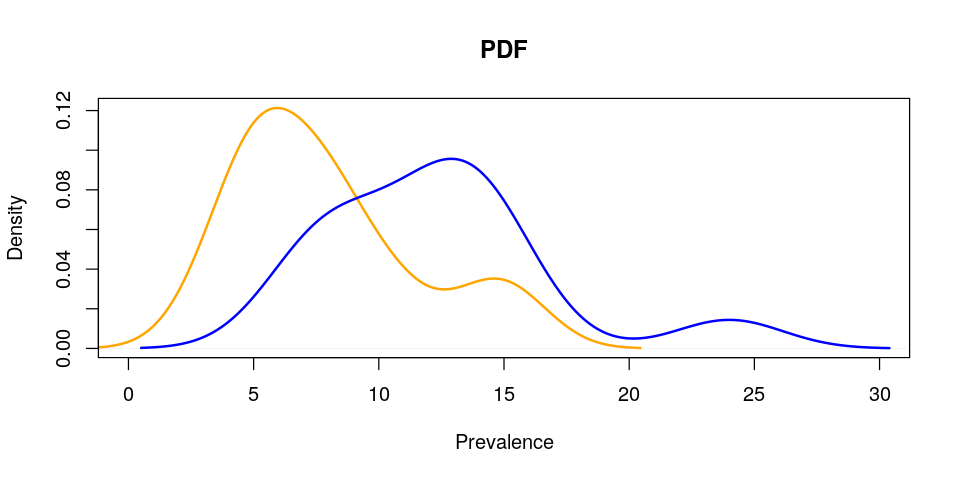

In [6]:
# ----------------------------------
# Hypothesis Test - Mean - Z Test & t.test()
# ----------------------------------

# Create sample 1 of West states
sample_1 = ASD_State_ADDM$Prevalence[ASD_State_ADDM$State_Region2 == "West"]
# Create sample 2 of East states
sample_2 = ASD_State_ADDM$Prevalence[ASD_State_ADDM$State_Region2 == "East"]

# variance test : Equal variance or Unequal variance?
var.test(sample_1, sample_2)

# t test : Equal variance t test
t.test(sample_1, sample_2, var.equal = TRUE)

# Visualise samples:
plot(density(sample_2), col="orange", xlab="Prevalence", main="PDF", 
     lwd=2, lty=1, xlim=c(0,30))
lines(density(sample_1), col="blue", lwd=2, lty=1)


https://www.statsdirect.co.uk/help/Default.htm#parametric_methods/unpaired_t.htm

https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests

https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Two-Sample_T-Test_from_Means_and_SDs.pdf



cal_n1: 13
cal_n2: 13
cal_df: 24
cal_s : 4.124652
cal_se: 1.617822
cal_t : 2.748235
cal_p : 0.01119334
mn_upper_ci: 13.99259
mn_lower_ci: 10.65357
fn_upper_ci: 9.546433
fn_lower_ci: 6.207413
Difference's Upper CI: 7.785174
Difference's Lower CI: 1.107134
Difference's Upper CI: 7.785174
Difference's Lower CI: 1.107134

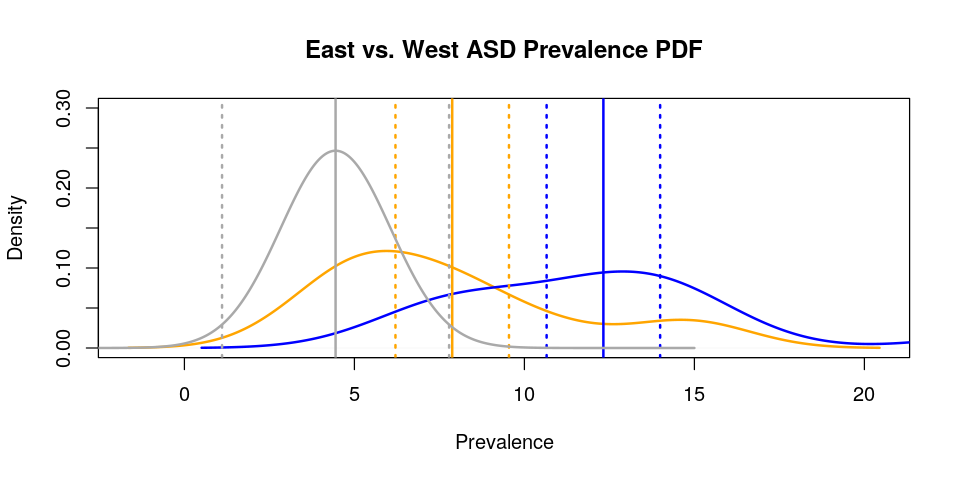

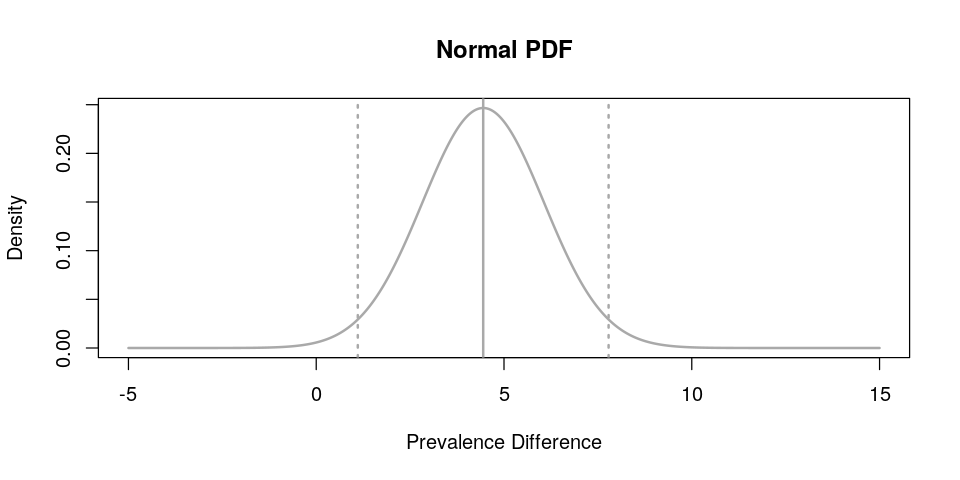

In [7]:
#############################################################
# Deep Dive : Equal variance t test
#############################################################

# sample size
cal_n1 = length(sample_1)
cat("\ncal_n1:", cal_n1)
cal_n2 = length(sample_2)
cat("\ncal_n2:", cal_n2)

# degree of freedom
cal_df = cal_n1 + cal_n2 - 2
cat("\ncal_df:", cal_df)

# pooled standard deviation
cal_s = sqrt(((cal_n1 - 1)*sd(sample_1)^2 + (cal_n2 - 1)*sd(sample_2)^2)
             /(cal_n1 + cal_n2 -2))
cat("\ncal_s :", cal_s)

# combined standard error
cal_se = cal_s * sqrt(1/cal_n1 + 1/cal_n2)
cat("\ncal_se:", cal_se)

# t statistic using combined standard error
cal_t = (mean(sample_1)-mean(sample_2)) / cal_se
cat("\ncal_t :", cal_t)

# p-value
cal_p = (1-pt(q = cal_t, df = cal_df)) * 2
cat("\ncal_p :", cal_p)

# 95% CI using "pooled standard deviation"
# sample_1 Upper CI
mn_upper_ci = mean(sample_1) + qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nmn_upper_ci:", mn_upper_ci)
# sample_1 Lower CI
mn_lower_ci = mean(sample_1) - qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nmn_lower_ci:", mn_lower_ci)
# sample_2 Upper CI
fn_upper_ci = mean(sample_2) + qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nfn_upper_ci:", fn_upper_ci)
# sample_2 Lower CI
fn_lower_ci = mean(sample_2) - qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nfn_lower_ci:", fn_lower_ci)
# Difference with 95% CI 
cat("\nDifference's Upper CI:", mn_upper_ci - fn_lower_ci)
cat("\nDifference's Lower CI:", mn_lower_ci - fn_upper_ci)

# Difference with 95% CI using combined standard error
# Difference's Upper CI
dif_upper_ci = mean(sample_1)-mean(sample_2) + qt(p = 0.975, df = cal_df)*cal_se
cat("\nDifference's Upper CI:", dif_upper_ci)
# Difference's Lower CI
dif_lower_ci = mean(sample_1)-mean(sample_2) - qt(p = 0.975, df = cal_df)*cal_se
cat("\nDifference's Lower CI:", dif_lower_ci)

# Visualise CIs: sample_1 & sample_2
plot(density(sample_2), col="orange", xlab="Prevalence", lwd=2, ylim=c(0,0.3), 
     main="East vs. West ASD Prevalence PDF")
lines(density(sample_1), col="blue", lwd=2)
# Overlay sample_1 CI
abline(v= mean(sample_1), col="blue", lwd=2, lty=1)
abline(v=mn_upper_ci, col="blue", lwd=2, lty=3)
abline(v=mn_lower_ci, col="blue", lwd=2, lty=3)
# Overlay sample_2 CI
abline(v= mean(sample_2), col="orange", lwd=2, lty=1)
abline(v=fn_upper_ci, col="orange", lwd=2, lty=3)
abline(v=fn_lower_ci, col="orange", lwd=2, lty=3)

# Overlay Difference's CI
abline(v=mean(sample_1)-mean(sample_2), col="darkgrey", lwd=2, lty=1)
abline(v=dif_upper_ci, col="darkgrey", lwd=2, lty=3)
abline(v=dif_lower_ci, col="darkgrey", lwd=2, lty=3)
cal_xseq <- seq(-5,15,0.01)
cal_pdf <- dnorm(x = cal_xseq, mean = mean(sample_1)-mean(sample_2), sd = cal_se)
lines(cal_xseq, cal_pdf, col="darkgrey", type="l",lwd=2)

# Visualise Difference's CIs alone:
plot(cal_xseq, cal_pdf, col="darkgrey", xlab="Prevalence Difference", 
     ylab="Density", type="l",lwd=2, main="Normal PDF")
# Overlay Difference's CI
abline(v=mean(sample_1)-mean(sample_2), col="darkgrey", lwd=2, lty=1)
abline(v=dif_upper_ci, col="darkgrey", lwd=2, lty=3)
abline(v=dif_lower_ci, col="darkgrey", lwd=2, lty=3)


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Hypothesis Test - Proportion - prop.test()
    </h3>
</div>


### <span style="color:blue">Is there a (statistically significant) difference of ASD Prevelance (proportion) between two US. States?</span>

**Two sample proportion test (t test):**

https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval

**Prepare samples**

In [8]:
# Filter and create dataframe of different data sources, for easy data access
ASD_State_SPED <- subset(ASD_State, Source == 'sped')

# ----------------------------------
# Use a sample of one US. State's ASD prevalence (proportion) to estimate:
# Prevalence of THAT US. State's ALL Children (the *Population*) [Source SPED, Year 2016] 
# ----------------------------------

# No. Children with ASD
ASD  <- ASD_State_SPED$Numerator_ASD[ASD_State_SPED$Year == 2016]
# 
str(ASD)
# No. Children with ASD of first US. State (AL-Alabama)
ASD[1]

# No. Children surveyed
Children  <- ASD_State_SPED$Denominator[ASD_State_SPED$Year == 2016]
# 
str(Children)
# No. Children surveyed of first US. State (AL-Alabama)
Children[1]

 int [1:50] 6140 1204 10746 4181 79041 5902 7391 1383 782 30920 ...


[1] 6140

 int [1:50] 674701 119217 1033241 440130 5686400 808556 479961 124609 65732 2555399 ...


[1] 674701

**Two group hypothesis test : proportions (Prevalvence) among two US. States**

In [9]:
# ----------------------------------
# Hypothesis Test - Proportion - prop.test()
# ----------------------------------

# Two group hypothesis test : proportions (Prevalvence) among two US. States
prop.test(ASD[1:2], Children[1:2])



	2-sample test for equality of proportions with continuity correction

data:  ASD[1:2] out of Children[1:2]
X-squared = 10.922, df = 1, p-value = 0.0009503
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0016149661 -0.0003828408
sample estimates:
     prop 1      prop 2 
0.009100327 0.010099231 


**Multiple group hypothesis test : proportions (Prevalvence) among all US. Statess**

In [10]:
# ----------------------------------
# Hypothesis Test - Proportion - prop.test()
# ----------------------------------

# Multiple group hypothesis test : proportions (Prevalvence) among all US. States
prop.test(ASD, Children)


	50-sample test for equality of proportions without continuity
	correction

data:  ASD out of Children
X-squared = 28593, df = 49, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
     prop 1      prop 2      prop 3      prop 4      prop 5      prop 6 
0.009100327 0.010099231 0.010400284 0.009499466 0.013900007 0.007299433 
     prop 7      prop 8      prop 9     prop 10     prop 11     prop 12 
0.015399168 0.011098717 0.011896793 0.012099872 0.010300278 0.008299863 
    prop 13     prop 14     prop 15     prop 16     prop 17     prop 18 
0.009498530 0.011000237 0.014200361 0.001399357 0.008200786 0.009299486 
    prop 19     prop 20     prop 21     prop 22     prop 23     prop 24 
0.006900015 0.016696937 0.011900547 0.017399589 0.011199751 0.019400428 
    prop 25     prop 26     prop 27     prop 28     prop 29     prop 30 
0.009499812 0.012399961 0.005500221 0.010800730 0.012698882 0.014097784 
    prop 31     prop 32     prop 33     prop 34     prop 35     prop

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Hypothesis Test - Case Study: Understanding the newborn gender differences in Singapore
    </h3>
</div>


https://data.gov.sg/dataset/newborns-by-gender


![](../reference/newborns-by-gender/boygirl.jpg)


![](../reference/newborns-by-gender/newborns-by-gender-chart.png)


![](../reference/newborns-by-gender/newborns-by-gender-table.png)


Above tabular CSV data from Data.gov.sg https://data.gov.sg/dataset/e55726f8-6d91-4cad-8e40-d4aa10ec7877/download

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [11]:
df_newborns <- read.csv("../reference/newborns-by-gender/newborns-by-gender-from-1984-2018.csv")
head(df_newborns)
tail(df_newborns)

year,gender,newborns
1984,Males,21661
1984,Females,19894
1984,Unknown,1
1985,Males,22027
1985,Females,20452
1985,Unknown,5


,year,gender,newborns
100,2017,Males,20408
101,2017,Females,19207
102,2017,Unknown,0
103,2018,Males,20093
104,2018,Females,18945
105,2018,Unknown,1


In [12]:
# Example of filtering data
subset(df_newborns, year == 2018, select = c(year, gender, newborns))

,year,gender,newborns
103,2018,Males,20093
104,2018,Females,18945
105,2018,Unknown,1


In [13]:
# year 2018 Male newborn number
subset(df_newborns, year == 2018 & gender == "Males")$newborns

[1] 20093

In [14]:
# year 2018 Female newborn number
subset(df_newborns, year == 2018 & gender == "Females")$newborns

[1] 18945

---

### <span style="color:blue">Is the Male newborn proportion similar (statistically equal) to Female newborn proportion, expected as a natural 50%-50%?</span>
    
**One sample proportion test:**

In [15]:
# year 2018 Male newborn proportion vs. expected 50% ratio (null probability 0.5)
mn = subset(df_newborns, year == 2018 & gender == "Males")$newborns # Male newborns
fn = subset(df_newborns, year == 2018 & gender == "Females")$newborns # Female newborns
total = mn + fn

prop.test(x = mn, n = total)
# prop.test(x = mn, n = total, alternative = "greater")


	1-sample proportions test with continuity correction

data:  mn out of total, null probability 0.5
X-squared = 33.701, df = 1, p-value = 6.428e-09
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5097318 0.5196725
sample estimates:
        p 
0.5147036 


---

### <span style="color:blue">Is there a (statistically significant) change of Male newborn ratio now and then, i.e. 2018 vs. 1984?</span>

**Two sample proportion test:**

In [16]:
subset(df_newborns[order(-df_newborns$year),], year %in% c(2018, 1984) & gender == "Males")

,year,gender,newborns
103,2018,Males,20093
1,1984,Males,21661


In [17]:
subset(df_newborns[order(-df_newborns$year),], year %in% c(2018, 1984) & gender == "Females")

,year,gender,newborns
104,2018,Females,18945
2,1984,Females,19894


In [18]:
# year 2018 Male newborn proportion vs. year 1984 Male newborn proportion
mn = subset(df_newborns[order(-df_newborns$year),], year %in% c(2018, 1984) 
            & gender == "Males")$newborns # Male newborns
fn = subset(df_newborns[order(-df_newborns$year),], year %in% c(2018, 1984) 
            & gender == "Females")$newborns # Female newborns
total = mn + fn

prop.test(x = mn, n = total)
# prop.test(x = mn, n = total, alternative = "less")


	2-sample test for equality of proportions with continuity correction

data:  mn out of total
X-squared = 3.4404, df = 1, p-value = 0.06362
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0134849792  0.0003702646
sample estimates:
   prop 1    prop 2 
0.5147036 0.5212610 


---

### <span style="color:blue">Is there a (statistically significant) difference between average number of Male newborns and average number of Female newborns?</span>

**Two sample mean test (t test):**

In [19]:
mn_all = subset(df_newborns[order(-df_newborns$year),], gender == "Males")
dim(mn_all)
head(mn_all)

[1] 35  3

,year,gender,newborns
103,2018,Males,20093
100,2017,Males,20408
97,2016,Males,21315
94,2015,Males,21755
91,2014,Males,21679
88,2013,Males,20528


In [20]:
fn_all = subset(df_newborns[order(-df_newborns$year),], gender == "Females")
dim(fn_all)
head(fn_all)

[1] 35  3

,year,gender,newborns
104,2018,Females,18945
101,2017,Females,19207
98,2016,Females,19936
95,2015,Females,20430
92,2014,Females,20552
89,2013,Females,19191



Male   average newborns: 22319.94
Female average newborns: 20836.89

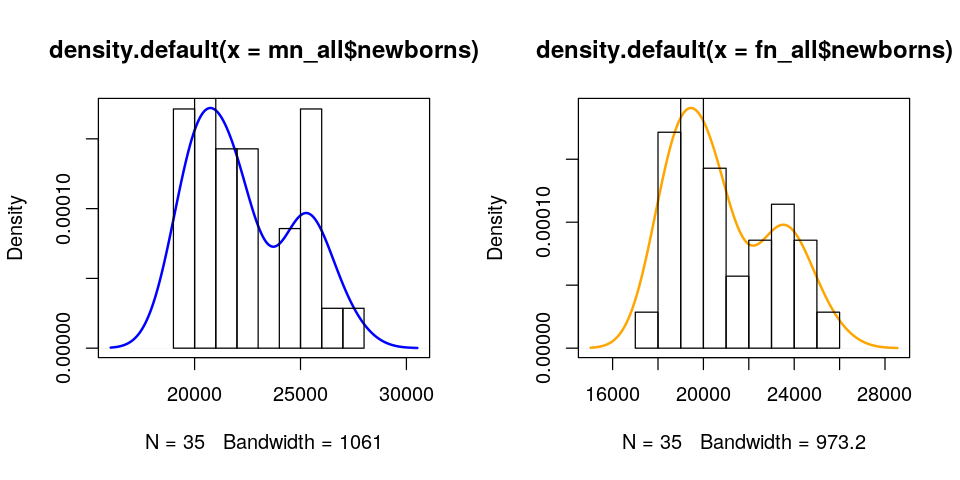

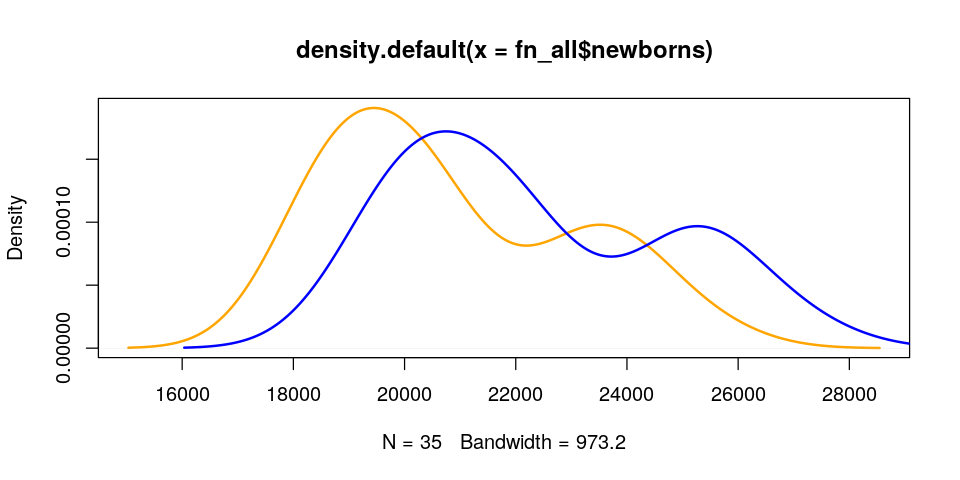

In [21]:
cat("\nMale   average newborns:", mean(mn_all$newborns)) # Male average
cat("\nFemale average newborns:", mean(fn_all$newborns)) # Female average

# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

par(mfrow=c(1, 2))
# Male
plot(density(mn_all$newborns), col="blue", lwd=2) 
hist(mn_all$newborns, probability = T, add = T)
# Female
plot(density(fn_all$newborns), col="orange", lwd=2) 
hist(fn_all$newborns, probability = T, add = T)

par(mfrow=c(1, 1))

plot(density(fn_all$newborns), col="orange", lwd=2)
lines(density(mn_all$newborns), col="blue", lwd=2)


In [22]:
# t test with equal variance:
t.test(mn_all$newborns, fn_all$newborns, paired = FALSE, var.equal = TRUE)
# t.test(mn_all$newborns, fn_all$newborns, paired = FALSE, var.equal = TRUE, alternative = "greater")



	Two Sample t-test

data:  mn_all$newborns and fn_all$newborns
t = 2.6935, df = 68, p-value = 0.008898
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  384.3287 2581.7855
sample estimates:
mean of x mean of y 
 22319.94  20836.89 



cal_n1: 35
cal_n2: 35
cal_df: 68
cal_s : 2303.374
cal_se: 550.6116
cal_t : 2.693472
cal_p : 0.00889784
mn_upper_ci: 22869.31
mn_lower_ci: 21770.58
fn_upper_ci: 21386.25
fn_lower_ci: 20287.52
Difference's Upper CI: 2581.786
Difference's Lower CI: 384.3287
Difference's Upper CI: 2581.786
Difference's Lower CI: 384.3287

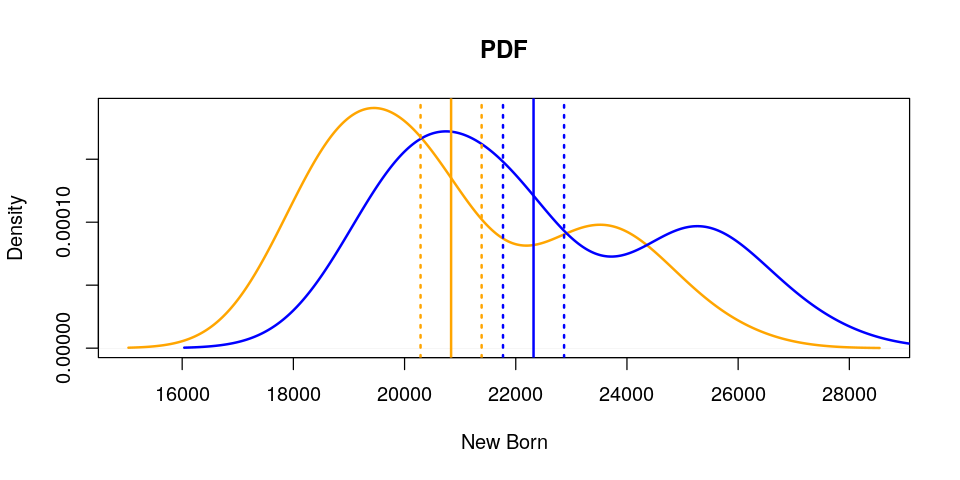

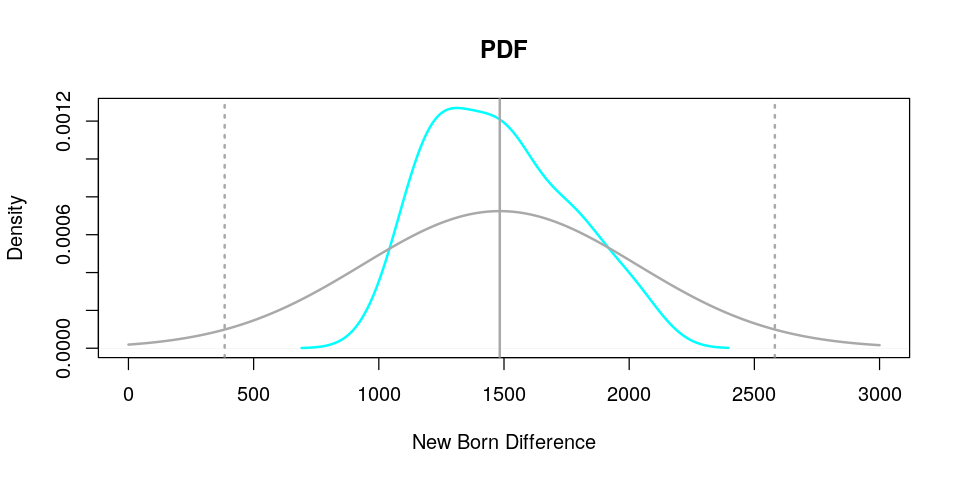

In [23]:
#############################################################
# Deep Dive : Equal variance t test
#############################################################

# sample size
cal_n1 = length(mn_all$newborns)
cat("\ncal_n1:", cal_n1)
cal_n2 = length(fn_all$newborns)
cat("\ncal_n2:", cal_n2)

# degree of freedom
cal_df = cal_n1 + cal_n2 - 2
cat("\ncal_df:", cal_df)

# pooled standard deviation
cal_s = sqrt(((cal_n1 - 1)*sd(mn_all$newborns)^2 + (cal_n2 - 1)*sd(fn_all$newborns)^2)/(cal_n1 + cal_n2 -2))
cat("\ncal_s :", cal_s)

# combined standard error
cal_se = cal_s*sqrt(1/cal_n1 + 1/cal_n2)
cat("\ncal_se:", cal_se)

# t statistic using combined standard error
cal_t = (mean(mn_all$newborns)-mean(fn_all$newborns))/cal_se
cat("\ncal_t :", cal_t)

# p-value
cal_p = (1-pt(q = cal_t, df = cal_df))*2
cat("\ncal_p :", cal_p)

# 95% CI using "pooled standard deviation"
# Male Upper CI
mn_upper_ci = mean(mn_all$newborns) + qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nmn_upper_ci:", mn_upper_ci)
# Male Lower CI
mn_lower_ci = mean(mn_all$newborns) - qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nmn_lower_ci:", mn_lower_ci)
# Female Upper CI
fn_upper_ci = mean(fn_all$newborns) + qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nfn_upper_ci:", fn_upper_ci)
# Female Lower CI
fn_lower_ci = mean(fn_all$newborns) - qt(p = 0.975, df = cal_df)*cal_s/sqrt(cal_n1+cal_n2)
cat("\nfn_lower_ci:", fn_lower_ci)
# Difference with 95% CI 
cat("\nDifference's Upper CI:", mn_upper_ci - fn_lower_ci)
cat("\nDifference's Lower CI:", mn_lower_ci - fn_upper_ci)

# Difference with 95% CI using combined standard error
# Difference's Upper CI
dif_upper_ci = mean(mn_all$newborns)-mean(fn_all$newborns) + qt(p = 0.975, df = cal_df)*cal_se
cat("\nDifference's Upper CI:", dif_upper_ci)
# Difference's Lower CI
dif_lower_ci = mean(mn_all$newborns)-mean(fn_all$newborns) - qt(p = 0.975, df = cal_df)*cal_se
cat("\nDifference's Lower CI:", dif_lower_ci)

# Visualise CIs: Male & Female
plot(density(fn_all$newborns), col="orange", xlab="New Born", main="PDF", lwd=2)
lines(density(mn_all$newborns), col="blue", lwd=2)
# Overlay Male CI
abline(v= mean(mn_all$newborns), col="blue", lwd=2, lty=1)
abline(v=mn_upper_ci, col="blue", lwd=2, lty=3)
abline(v=mn_lower_ci, col="blue", lwd=2, lty=3)
# Overlay Female CI
abline(v= mean(fn_all$newborns), col="orange", lwd=2, lty=1)
abline(v=fn_upper_ci, col="orange", lwd=2, lty=3)
abline(v=fn_lower_ci, col="orange", lwd=2, lty=3)

# Visualise CIs: Difference between Male and Female
plot(density(mn_all$newborns-fn_all$newborns), col="cyan", xlab="New Born Difference", 
     main="PDF", lwd=2, lty=1, xlim=c(0,3000))
# Overlay Difference's CI
abline(v=mean(mn_all$newborns)-mean(fn_all$newborns), col="darkgrey", lwd=2, lty=1)
abline(v=dif_upper_ci, col="darkgrey", lwd=2, lty=3)
abline(v=dif_lower_ci, col="darkgrey", lwd=2, lty=3)
cal_xseq <- seq(0,3000,0.01)
cal_pdf <- dnorm(x = cal_xseq, mean = mean(mn_all$newborns)-mean(fn_all$newborns), sd = cal_se)
lines(cal_xseq, cal_pdf, col="darkgrey", type="l",lwd=2)


---

In [24]:
# t test with unequal variances
t.test(mn_all$newborns, fn_all$newborns, paired = FALSE)
# t.test(mn_all$newborns, fn_all$newborns, paired = FALSE, alternative = "greater")



	Welch Two Sample t-test

data:  mn_all$newborns and fn_all$newborns
t = 2.6935, df = 67.497, p-value = 0.008912
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  384.1804 2581.9339
sample estimates:
mean of x mean of y 
 22319.94  20836.89 



cal_n1: 35
cal_n2: 35
cal_df: 67.49676
cal_se: 550.6116
cal_t : 2.693472
cal_p : 0.008912138
Difference's Upper CI: 2581.934
Difference's Lower CI: 384.1804

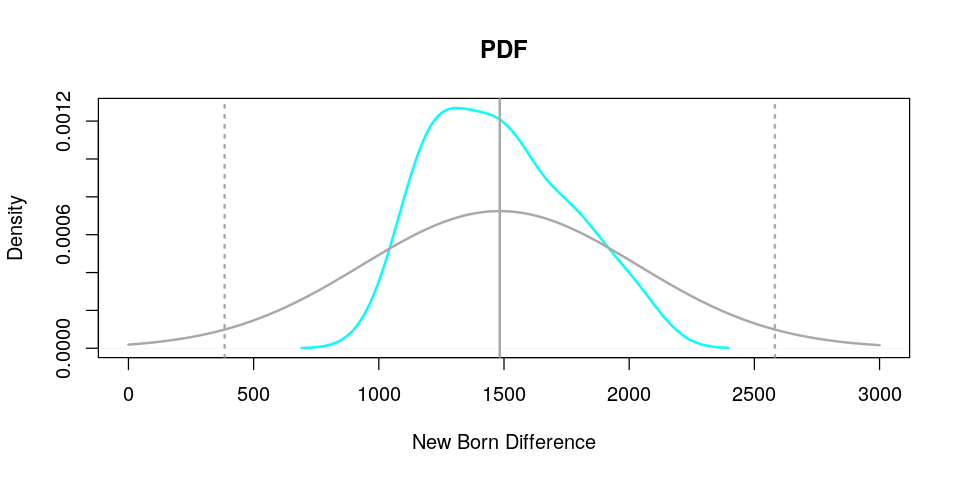

In [25]:
#############################################################
# Deep Dive : Unequal variance t test
#############################################################

# sample size
cal_n1 = length(mn_all$newborns)
cat("\ncal_n1:", cal_n1)
cal_n2 = length(fn_all$newborns)
cat("\ncal_n2:", cal_n2)

# degree of freedom
# cal_df = cal_n1 + cal_n2 - 2 # <-- This is df of equal variances
cal_df = ( sd(mn_all$newborns)^2/cal_n1 + sd(fn_all$newborns)^2/cal_n2 )^2 / 
    ((sd(mn_all$newborns)^2/cal_n1)^2/(cal_n1 - 1) + (sd(fn_all$newborns)^2/cal_n2)^2/(cal_n2 - 1))
cat("\ncal_df:", cal_df)

# combined standard error: Welch's denominator (It is NOT a pooled standard deviation)
cal_se = sqrt( sd(mn_all$newborns)^2/cal_n1 + sd(fn_all$newborns)^2/cal_n2 )
cat("\ncal_se:", cal_se)

# t statistic using combined standard error: Welch's denominator
cal_t = (mean(mn_all$newborns)-mean(fn_all$newborns))/cal_se
cat("\ncal_t :", cal_t)

# p-value
cal_p = (1-pt(q = cal_t, df = cal_df))*2
cat("\ncal_p :", cal_p)

# Difference with 95% CI using combined standard error
# Difference's Upper CI
dif_upper_ci = mean(mn_all$newborns)-mean(fn_all$newborns) + qt(p = 0.975, df = cal_df)*cal_se
cat("\nDifference's Upper CI:", dif_upper_ci)
# Difference's Lower CI
dif_lower_ci = mean(mn_all$newborns)-mean(fn_all$newborns) - qt(p = 0.975, df = cal_df)*cal_se
cat("\nDifference's Lower CI:", dif_lower_ci)

# Visualise CIs:
plot(density(mn_all$newborns-fn_all$newborns), col="cyan", xlab="New Born Difference", 
     main="PDF", lwd=2, lty=1, xlim=c(0,3000))
# Overlay Difference's CI
abline(v=mean(mn_all$newborns)-mean(fn_all$newborns), col="darkgrey", lwd=2, lty=1)
abline(v=dif_upper_ci, col="darkgrey", lwd=2, lty=3)
abline(v=dif_lower_ci, col="darkgrey", lwd=2, lty=3)
cal_xseq <- seq(0,3000,0.01)
cal_pdf <- dnorm(x = cal_xseq, mean = mean(mn_all$newborns)-mean(fn_all$newborns), sd = cal_se)
lines(cal_xseq, cal_pdf, col="darkgrey", type="l",lwd=2)

---

### <span style="color:blue">Is the difference(s) between number of Male newborns and number of Female newborns stable (non-random) over the years?</span>

**Two sample mean test (paired t test):**

In [26]:
t.test(mn_all$newborns, fn_all$newborns, paired = TRUE)
# t.test(mn_all$newborns, fn_all$newborns, paired = TRUE, alternative = "greater")



	Paired t-test

data:  mn_all$newborns and fn_all$newborns
t = 32.368, df = 34, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1389.942 1576.172
sample estimates:
mean of the differences 
               1483.057 


**<span style="color:blue">[ Tips ]</span> Paired t test essentially evaluates the <span style="color:blue">difference</span> of two samples, assuming 'the difference' forming a t/normal distribution.**


	Shapiro-Wilk normality test

data:  mn_all$newborns - fn_all$newborns
W = 0.9522, p-value = 0.1324


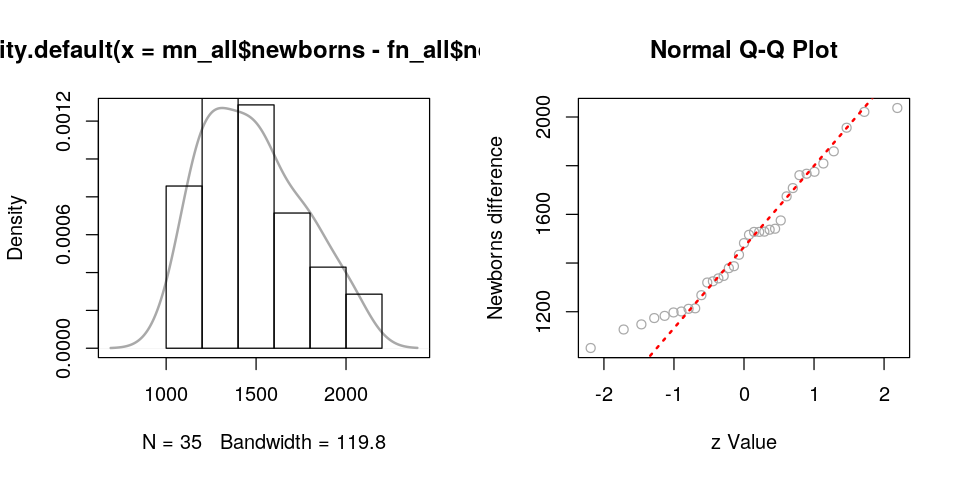

In [27]:
# Difference between Male and Female newborns

# Normality test:
shapiro.test(mn_all$newborns - fn_all$newborns)

# Visualise:
par(mfrow=c(1, 2))
plot(density(mn_all$newborns - fn_all$newborns), col="darkgrey", lwd=2) 
hist(mn_all$newborns - fn_all$newborns, probability = T, add = T)

qqnorm(mn_all$newborns - fn_all$newborns, col="darkgrey", 
       xlab="z Value", ylab="Newborns difference")
qqline(mn_all$newborns - fn_all$newborns, col="red", lwd=2, lty=3)
par(mfrow=c(1, 1))


cal_n : 35
cal_df: 34
cal_s : 271.0677
cal_se: 45.81881
cal_t : 32.36787
cal_p : 0
dif_upper_ci: 1576.172
dif_lower_ci: 1389.942
Paired Difference's Upper CI: 1576.172
Paired Difference's Lower CI: 1389.942

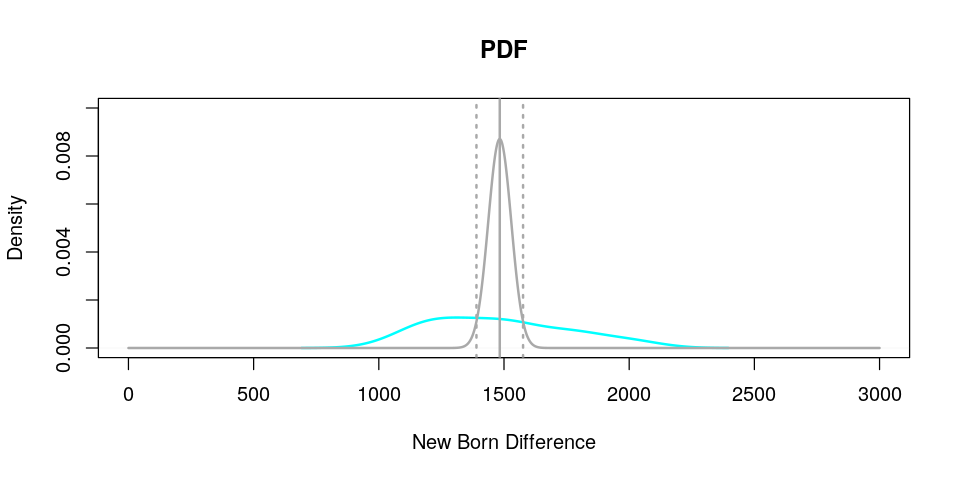

In [28]:
#############################################################
# Deep Dive : Paired t test
#############################################################

# sample size
cal_n = length(mn_all$newborns - fn_all$newborns)
cat("\ncal_n :", cal_n)

# degree of freedom
cal_df = cal_n - 1
cat("\ncal_df:", cal_df)

# standard deviation
cal_s = sd(mn_all$newborns - fn_all$newborns)
cat("\ncal_s :", cal_s)

# standard error
cal_se = cal_s / sqrt(cal_n)
cat("\ncal_se:", cal_se)

# t statistic calculated using standard error:
cal_t = mean(mn_all$newborns-fn_all$newborns)/cal_se
cat("\ncal_t :", cal_t)

# p-value
cal_p = (1-pt(q = cal_t, df = cal_df))*2
cat("\ncal_p :", cal_p)

# 95% CI using "standard deviation"
# Paired Difference's Upper CI
dif_upper_ci = mean(mn_all$newborns-fn_all$newborns) + qt(p = 0.975, df = cal_df)*cal_se
cat("\ndif_upper_ci:", dif_upper_ci)
# Paired Difference's Lower CI
dif_lower_ci = mean(mn_all$newborns-fn_all$newborns) - qt(p = 0.975, df = cal_df)*cal_se
cat("\ndif_lower_ci:", dif_lower_ci)

# Visualise CIs:
plot(density(mn_all$newborns-fn_all$newborns), col="cyan", xlab="New Born Difference", 
     main="PDF", lwd=2, lty=1, xlim=c(0,3000), ylim=c(0,0.01))
# Overlay CI
abline(v= mean(mn_all$newborns-fn_all$newborns), col="darkgrey", lwd=2, lty=1)
abline(v=dif_upper_ci, col="darkgrey", lwd=2, lty=3)
abline(v=dif_lower_ci, col="darkgrey", lwd=2, lty=3)
cal_xseq <- seq(0,3000,0.01)
cal_pdf <- dnorm(x = cal_xseq, mean = mean(mn_all$newborns-fn_all$newborns), sd = cal_se)
lines(cal_xseq, cal_pdf, col="darkgrey", type="l",lwd=2)

cat("\nPaired Difference's Upper CI:", dif_upper_ci)
cat("\nPaired Difference's Lower CI:", dif_lower_ci)

---

### <span style="color:blue">Is the difference(s) between Male newborns ratio/proportion and Female newborns ratio/proportion stable (non-random) over the years?</span>

**Two sample mean test (paired t test):**


	Paired t-test

data:  mn_all$newborns/(mn_all$newborns + fn_all$newborns) and fn_all$newborns/(mn_all$newborns + fn_all$newborns)
t = 47.032, df = 34, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03277953 0.03574025
sample estimates:
mean of the differences 
             0.03425989 



	Paired t-test

data:  mn_all$newborns/(mn_all$newborns + fn_all$newborns) and fn_all$newborns/(mn_all$newborns + fn_all$newborns)
t = 47.032, df = 34, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.03302816        Inf
sample estimates:
mean of the differences 
             0.03425989 



	Shapiro-Wilk normality test

data:  (mn_all$newborns - fn_all$newborns)/(mn_all$newborns + fn_all$newborns)
W = 0.95524, p-value = 0.1641


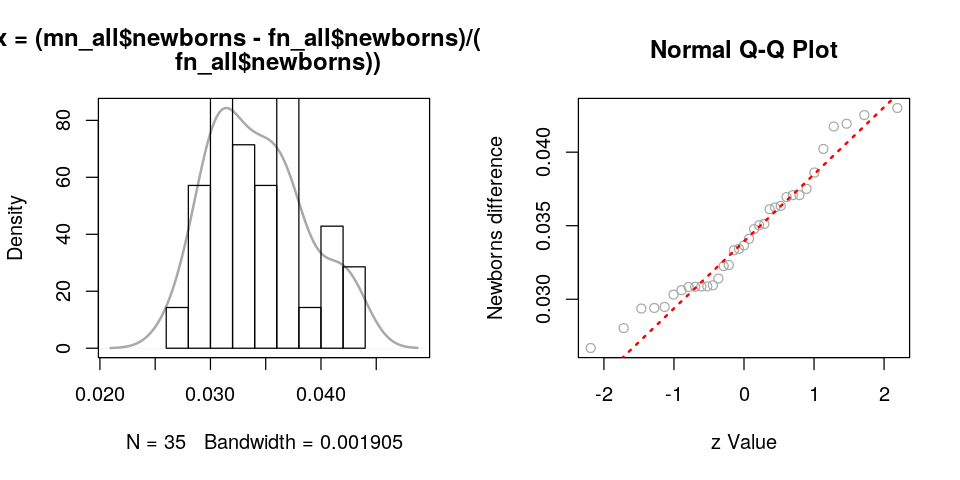

In [29]:
# Proportion difference between Male and Female newborns

# Uncomment below to display Male & Female newborns ratio/proportion over years:
# mn_all$newborns/(mn_all$newborns+fn_all$newborns)
# fn_all$newborns/(mn_all$newborns+fn_all$newborns)

t.test(mn_all$newborns/(mn_all$newborns+fn_all$newborns), 
       fn_all$newborns/(mn_all$newborns+fn_all$newborns), paired = TRUE)
t.test(mn_all$newborns/(mn_all$newborns+fn_all$newborns), 
       fn_all$newborns/(mn_all$newborns+fn_all$newborns), paired = TRUE, alternative = "greater")

# Normality test:
shapiro.test((mn_all$newborns - fn_all$newborns)/(mn_all$newborns+fn_all$newborns))

# Visualise:
par(mfrow=c(1, 2))
plot(density((mn_all$newborns - fn_all$newborns)/(mn_all$newborns+fn_all$newborns)), col="darkgrey", lwd=2) 
hist((mn_all$newborns - fn_all$newborns)/(mn_all$newborns+fn_all$newborns), probability = T, add = T)

qqnorm((mn_all$newborns - fn_all$newborns)/(mn_all$newborns+fn_all$newborns), col="darkgrey", 
       xlab="z Value", ylab="Newborns difference")
qqline((mn_all$newborns - fn_all$newborns)/(mn_all$newborns+fn_all$newborns), col="red", lwd=2, lty=3)
par(mfrow=c(1, 1))

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        TBD
    </p>
</div>

In [30]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
# TBD

-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
</div>

### Excellent! You have completed the workshop notebook!

**Connect with the author:**

This notebook was written by [GU Zhan (Sam)](https://sg.linkedin.com/in/zhan-gu-27a82823 "GU Zhan (Sam)").

[Sam](https://www.iss.nus.edu.sg/about-us/staff/detail/201/GU_Zhan "GU Zhan (Sam)") is currently a lecturer in [Institute of Systems Science](https://www.iss.nus.edu.sg/ "NUS-ISS") in [National University of Singapore](http://www.nus.edu.sg/ "NUS"). He devotes himself into pedagogy & andragogy, and is very passionate in inspiring next generation of artificial intelligence lovers and leaders.


Copyright &copy; 2020 GU Zhan

This notebook and its source code are released under the terms of the [MIT License](https://en.wikipedia.org/wiki/MIT_License "Copyright (c) 2020 GU ZHAN").

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<div class="alert alert-block alert-info" style="margin-top: 20px">
</div>

## <span style="color:blue">Appendices</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Interactive workshops: < Learning R inside R > using swirl() (in R/RStudio)
    </h3>
</div>

https://github.com/telescopeuser/S-SB-Workshop


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://github.com/dd-consulting">
         <img src="../reference/GZ_logo.png" width="60" align="right">
    </a>
</div>


---